In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# apparently scipy has some bug showing an error
# https://github.com/scipy/scipy/issues/5998
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# get the cleaned data
data = pd.read_csv('../yjkweon24/kc_house_cleaned.csv')
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15
0,1,7129300520,20141013,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340
1,2,6414100192,20141209,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690
2,3,5631500400,20150225,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720
3,4,2487200875,20141209,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360
4,5,1954400510,20150218,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800


In [3]:
# split the train and test set
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

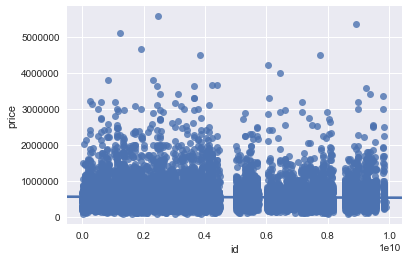

In [4]:
# show that some features (e.g. 'id') have doesn't have a linear relation
sns.regplot(data=train, x='id', y='price')

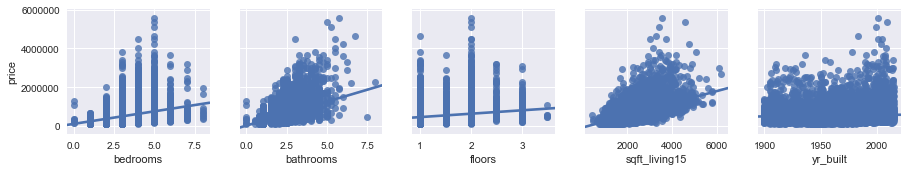

In [5]:
# target is always price
y_vars = ['price']
x_vars = ['bedrooms', 'bathrooms', 'floors', 'sqft_living15', 'yr_built']
sns.pairplot(train, kind='reg', y_vars=y_vars, x_vars=x_vars)

# unfortunately, seaborn doesn't yield the actual regression equation

In [7]:
# bathrooms, sqft_living15 seems pretty promising from the graph
def ols_mse(train, test, x_name, y_name):
    # extract the features and target we want
    train_x, test_x = [df[x_name].values.reshape((-1, 1)) for df in (train, test)]
    train_y, test_y = [df[y_name] for df in (train, test)]
    
    # run the linear regression
    linreg = LinearRegression()
    linreg.fit(train_x, train_y)
    predict = linreg.predict(test_x)
    
    return linreg, mean_squared_error(test_y, predict)

print('sqft_living15 mse:', ols_mse(train, test, 'sqft_living15', 'price')[1])
print('bathrooms mse:', ols_mse(train, test, 'bathrooms', 'price')[1])

sqft_living15 mse: 81839503905.84044
bathrooms mse: 91221742093.32884
